In [2]:
from toolkit.utils import read_data, display_analysis, derive_dvdf

## Introduction

This experiment is the first phase of our endevour to optimize the frontend of the race.
This optimization effort is done in a situation in which maximizing will hurt us on others.
(_e.g._, increasing frequency in most cases will favor the split time on one hand,
and would hurt the DPS as well as the physical condition of the swimmer). 

## About the results

Our experiment is consisted of 4-5 time of pairs of $25m$ interval, in linearily increasing cycle frequency.
The $X$ axis is the frequency (mesearued in cycles/minute),
the $Y$ axis represents the Distance-per-stroke (DPS), whereas the $Z$ axis is the measured speed.

## Note
The _Time_ columns represents the time of the surfaced swimming only, whereas the _Speed_ column is $25m$ divided by the total lap time - surfaced and submerged swimming. 

The experiment was done in a standard SCM pool.

## Shmuel (BK)

,Swimmer Name,Frequency,Cycle time,Num strokes,Time,DPS,Speed
71,Shmuel B,47.368421,1.266667,7.5,9.50,2.000000,2.631579
69,Shmuel B,43.478261,1.380000,7.0,9.66,2.142857,2.587992
73,Shmuel B,45.918367,1.306667,7.5,9.80,2.000000,2.551020
75,Shmuel B,41.584158,1.442857,7.0,10.10,2.142857,2.475248
74,Shmuel B,44.247788,1.356000,7.5,10.17,2.000000,2.458210
72,Shmuel B,42.857143,1.400000,7.5,10.50,2.000000,2.380952
70,Shmuel B,38.356164,1.564286,7.0,10.95,2.142857,2.283105
76,Shmuel B,39.130435,1.533333,7.5,11.50,2.000000,2.173913
77,Shmuel B,34.257749,1.751429,7.0,12.26,2.142857,2.039152


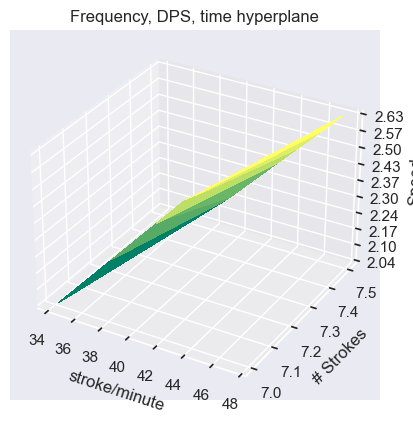

,Frequency,Num strokes
Frequency,1.000000,0.578257
Num strokes,0.578257,1.000000


,Num strokes,Time
Num strokes,1.000000,-0.257068
Time,-0.257068,1.000000


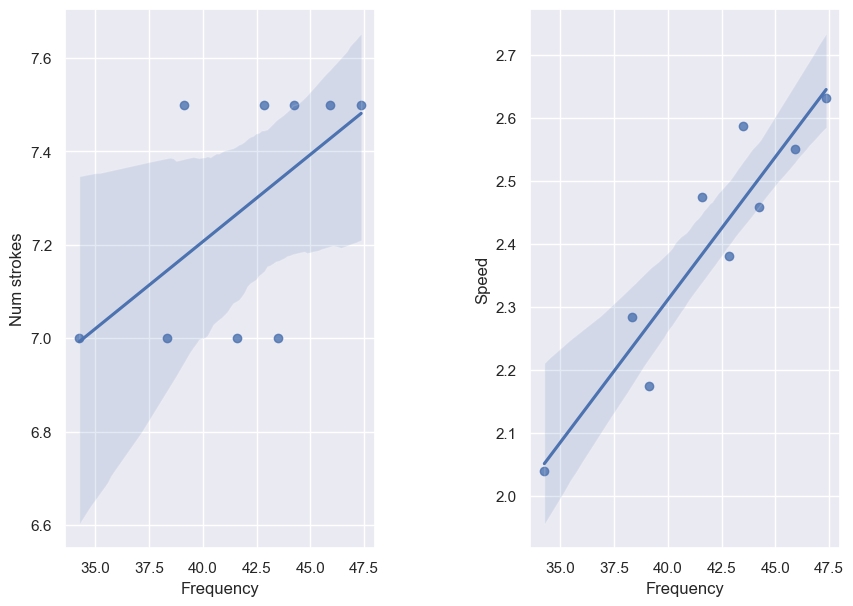

In [3]:
df_data = read_data("_data/raw-data.csv", "Shmuel B")
# Manutal hack, due to backward compatability issues.
df_data["Speed"] = 25 / df_data["Time"]
display_analysis(df_data)

In [4]:
(slope, pval) = derive_dvdf(df_data)
print(f"The slope is {slope}, with P-val of {pval}")

The slope is 0.05, with P-val of 0.0


# 

# Outliers removal

As this test suffered from outliers (coincidence?) after removing them, we get a clearer picture.

Index(['Swimmer Name', 'Freq', 'Cycle time', 'Num strokes', 'Time', 'DPS',
       'Speed'],
      dtype='object')

,Swimmer Name,Freq,Cycle time,Num strokes,Time,DPS,Speed
73,Shmuel B,45.918367,1.306667,7.5,9.80,2.000000,1.826150
71,Shmuel B,47.368421,1.266667,7.5,9.50,2.000000,1.815541
70,Shmuel B,38.356164,1.564286,7.0,10.95,2.142857,1.799856
75,Shmuel B,41.584158,1.442857,7.0,10.10,2.142857,1.790831
72,Shmuel B,42.857143,1.400000,7.5,10.50,2.000000,1.783167
76,Shmuel B,39.130435,1.533333,7.5,11.50,2.000000,1.748252
77,Shmuel B,34.257749,1.751429,7.0,12.26,2.142857,1.689189


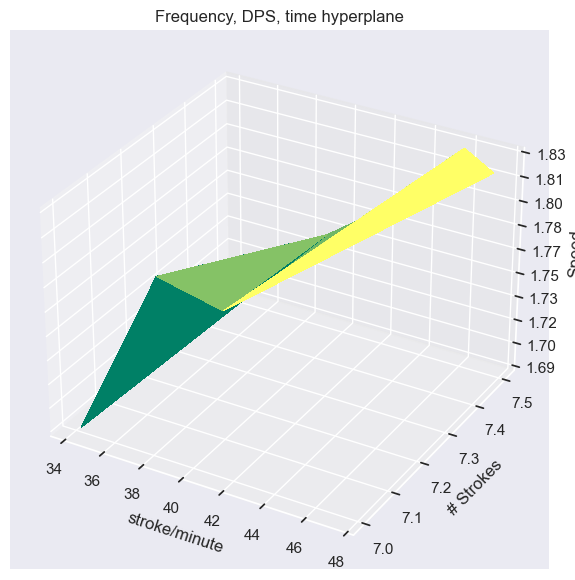

,Freq,Num strokes
Freq,1.000000,0.677457
Num strokes,0.677457,1.000000


,Num strokes,Time
Num strokes,1.000000,-0.424097
Time,-0.424097,1.000000


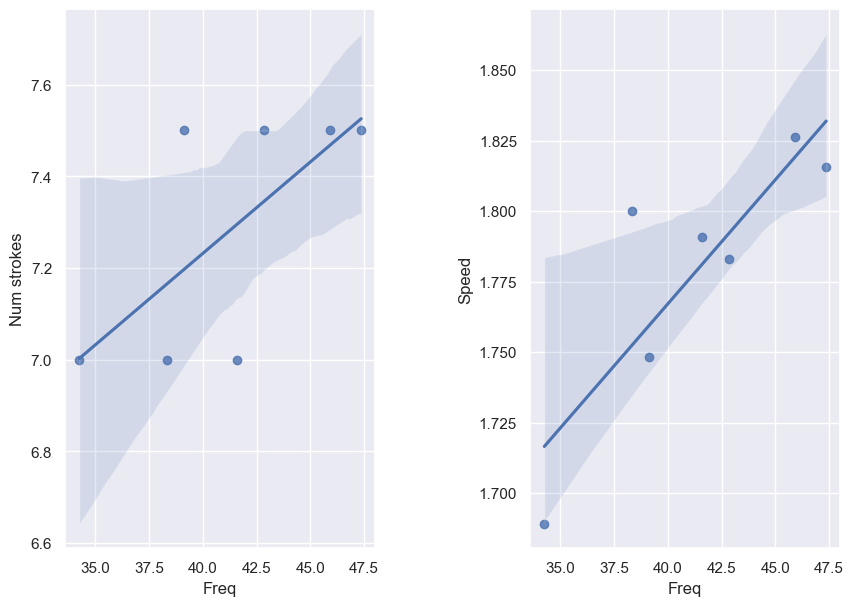

In [3]:
display(df_data.columns)
df_wo_outliers = df_data.drop(index=[69, 74])
display_analysis(df_wo_outliers)

# Insights

1. After removing the outliers, it is evidant that Shmuel can increase speed (up to $v \gt 1.8\frac{m}{sec}$!),
by increasing frequency. This is enabled by Shmuel's ability to maintain his DPS while increasing frequency.
1. The need to remove outliers (two out of nine samples) may indicate less concictancy compared to the one Shmuel has demondtrated in the b.s. experiment.
1. In either case, Shmuel's ability to reach these high speed/frequencies is a clear showcase that there is no mechanical ability for Shmuel to swim fast back stroke.
1. We may need to dig deeper for the root cause analysis on Shmuel's low-frequency in the 400 i.m.